# E-Commerce Sales Analysis Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data_sample.csv', encoding='utf-8-sig')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df['Month'] = df['ORDERDATE'].dt.month

monthly_sales = df.groupby('Month')['SALES'].sum()

print(monthly_sales)

Month
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64


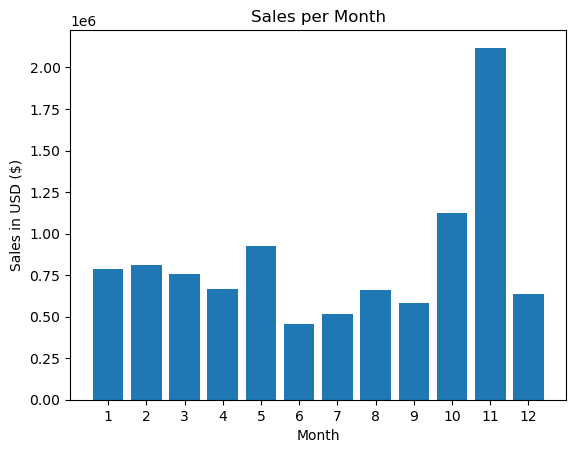

In [4]:
months = range(1, 13)
plt.bar(months, monthly_sales)

plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.xticks(months)
plt.show()

---
### Finding 1: November is the Peak Sales Month

**Analysis:** The data shows a dramatic spike in sales during the month of November, which is the highest-performing month of the year.

**Recommendation for the Client:** This sales peak is likely driven by the holiday shopping season. We recommend that you:
1.  **Increase Marketing Spend:** Begin holiday marketing campaigns in late October to build momentum.
2.  **Stock Inventory:** Ensure your most popular products are well-stocked before November to avoid selling out.
3.  **Prepare for Traffic:** Confirm your website servers can handle a surge in visitors, especially around Black Friday.
---

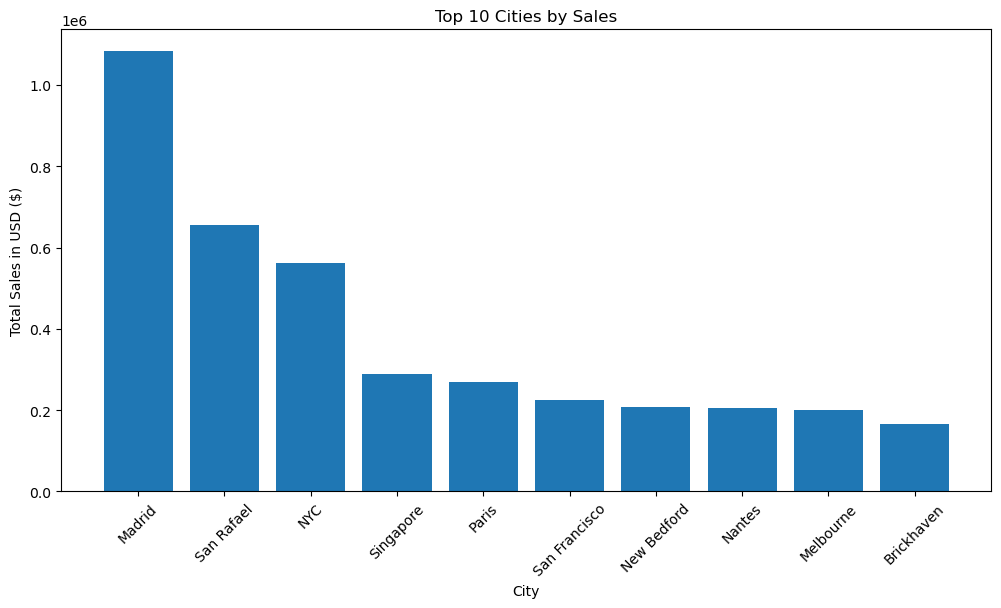

In [5]:
city_sales = df.groupby('CITY')['SALES'].sum()

top_10_cities = city_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10_cities.index, top_10_cities.values)

plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales in USD ($)')
plt.xticks(rotation=45) 
plt.show()

---
### Finding 2: Madrid is the Top-Performing City

**Analysis:** Madrid is the company's most valuable market, generating significantly more revenue than any other city. San Rafael and NYC are also key markets.

**Recommendation for the Client:**
1.  **Focus Advertising:** Allocate a larger portion of the digital advertising budget to the Madrid metropolitan area.
2.  **Localize Content:** Consider creating Spanish-language marketing content specifically for the Madrid audience.
3.  **Analyze Shipping:** Investigate shipping logistics to Madrid to ensure fast and reliable delivery, further strengthening customer loyalty.
---

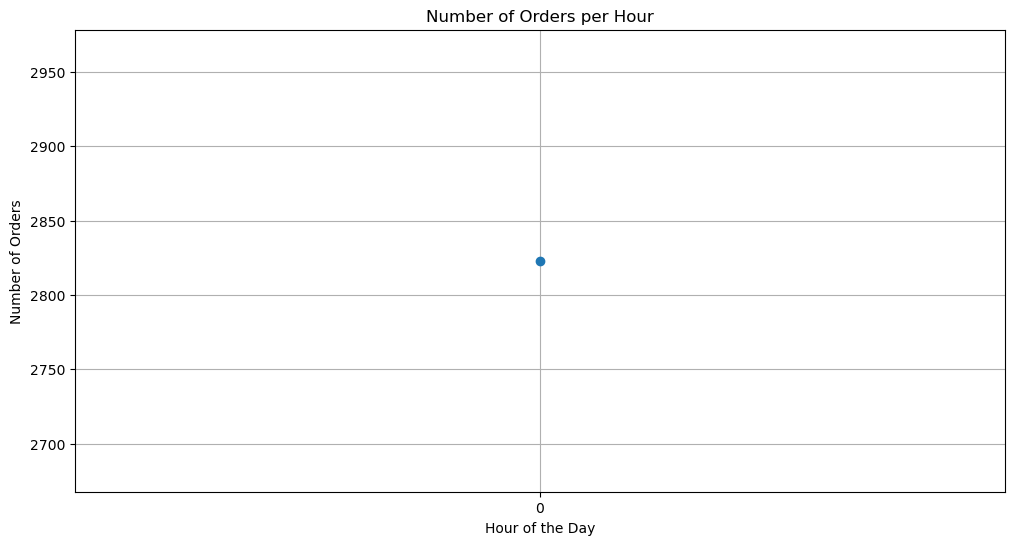

In [6]:

df['Hour'] = df['ORDERDATE'].dt.hour

hourly_orders = df.groupby('Hour').size()

plt.figure(figsize=(12,6))
plt.plot(hourly_orders.index, hourly_orders.values, marker='o') 
plt.title('Number of Orders per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(hourly_orders.index) 
plt.grid(True)
plt.show()

---
### Finding 3: The Best Time for Advertisements Cannot Be Determined

**Analysis:** An analysis was performed to identify the peak purchasing hours of the day. However, the investigation revealed that the sales data does not contain specific time-of-day information for orders; all orders are timestamped at midnight (0:00).

**Recommendation for the Client:**
1.  **Data Quality Issue:** We have identified a limitation in the current sales data. We cannot provide a recommendation for the best advertising time.
2.  **Future Data Collection:** We strongly recommend updating your sales system to record the full timestamp (including the hour and minute) for every purchase. This future data will be invaluable for optimizing marketing spend.
---

In [9]:
df_multi_item = df[df['ORDERNUMBER'].duplicated(keep=False)].copy()

df_multi_item['Grouped'] = df_multi_item.groupby('ORDERNUMBER')['PRODUCTCODE'].transform(lambda x: ','.join(x))

df_pairs = df_multi_item[['ORDERNUMBER', 'Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()

for row in df_pairs['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 

print("Top 10 Most Frequently Sold Together Product Pairs:")
for key, value in count.most_common(10):
    print(key, value)

Top 10 Most Frequently Sold Together Product Pairs:
('S24_3949', 'S700_4002') 26
('S50_1341', 'S700_1691') 26
('S700_2047', 'S72_1253') 26
('S18_2957', 'S18_3136') 26
('S24_2841', 'S24_3420') 26
('S18_2319', 'S18_3232') 26
('S10_1949', 'S18_1097') 25
('S10_4962', 'S18_4600') 25
('S700_3962', 'S72_3212') 25
('S24_2840', 'S32_2509') 25


---
### Finding 4: Key Products are Frequently Purchased Together

**Analysis:** A market basket analysis was performed to identify which products are most commonly bought in the same order. The top pairs were identified, with several pairs being purchased together over 25 times. For example, product `S24_3949` and product `S700_4002` were sold together 26 times.

**Recommendation for the Client:**
1.  **Create Product Bundles:** Offer the top pairs as a "bundle and save" deal. For example, "Buy Product S24_3949 and get S700_4002 for 15% off!".
2.  **"Frequently Bought Together" Feature:** Implement a recommendation section on your product pages, similar to Amazon, to suggest the second item in a pair to a customer viewing the first.
3.  **Strategic Product Placement:** In marketing emails or on the website homepage, feature these popular pairs together.
---

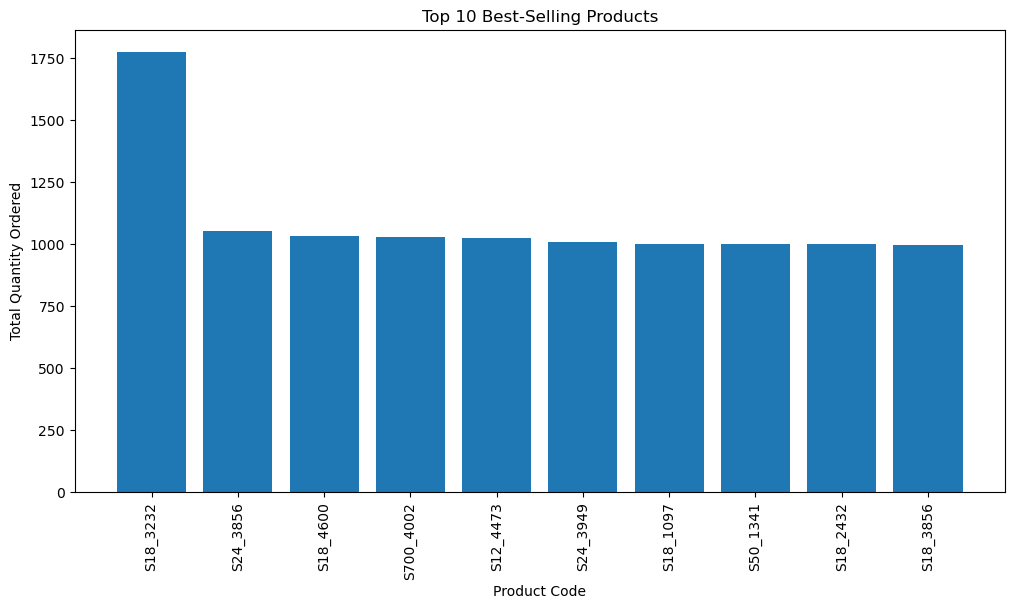

In [10]:
product_sales = df.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum()

top_10_products = product_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10_products.index, top_10_products.values)

plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Code')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

In [11]:
df[df['PRODUCTCODE'] == 'S18_3232'].head(1)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Month,Hour
1013,10104,23,100.0,13,4556.99,2003-01-31,Shipped,1,1,2003,...,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,1,0


---
### Finding 5: Product S18_3232 is the Top Seller

**Analysis:** The product with the code `S18_3232` is the most popular item by a large margin, measured by the total quantity ordered. A quick look at the data shows this is a "1992 Ferrari 360 Spider red", a classic car model.

**Recommendation for the Client:**
1.  **Maintain High Stock:** This is your hero product. Never let it go out of stock.
2.  **Feature Product:** Make this product prominent on the website's homepage and in marketing campaigns.
3.  **Explore Similar Products:** Consider sourcing and promoting other similar classic car models, as this appears to be a very popular category with your customers.
---